In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from mne import Epochs, pick_types, find_events
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

In [67]:
tmin, tmax = -1.,4.
event_id = dict(hands=2,feet=3)
subject = 1
runs = [6,10,14]

In [68]:
raw_files = []
raw_files.append(read_raw_edf("subjects/S001/S001R06.edf",preload=True,stim_channel='auto'))
raw_files.append(read_raw_edf("subjects/S001/S001R10.edf",preload=True,stim_channel='auto'))
raw_files.append(read_raw_edf("subjects/S001/S001R14.edf",preload=True,stim_channel='auto'))

Extracting EDF parameters from subjects/S001/S001R06.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from subjects/S001/S001R10.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from subjects/S001/S001R14.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [69]:
raw_files

[<RawEDF  |  S001R06.edf, n_channels x n_times : 65 x 20000 (125.0 sec), ~10.0 MB, data loaded>,
 <RawEDF  |  S001R10.edf, n_channels x n_times : 65 x 20000 (125.0 sec), ~10.0 MB, data loaded>,
 <RawEDF  |  S001R14.edf, n_channels x n_times : 65 x 20000 (125.0 sec), ~10.0 MB, data loaded>]

In [70]:
raw = concatenate_raws(raw_files)
raw

<RawEDF  |  S001R06.edf, n_channels x n_times : 65 x 60000 (375.0 sec), ~29.9 MB, data loaded>

In [71]:
raw.rename_channels(lambda x: x.strip('.'))

In [72]:
events = find_events(raw,shortest_event=0,stim_channel='STI 014')

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
89 events found
Event IDs: [1 2 3]


In [73]:
events

array([[  672,     0,     3],
       [ 1328,     0,     1],
       [ 2000,     0,     2],
       [ 2656,     0,     1],
       [ 3328,     0,     2],
       [ 3984,     0,     1],
       [ 4656,     0,     3],
       [ 5312,     0,     1],
       [ 5984,     0,     2],
       [ 6640,     0,     1],
       [ 7312,     0,     3],
       [ 7968,     0,     1],
       [ 8640,     0,     3],
       [ 9296,     0,     1],
       [ 9968,     0,     2],
       [10624,     0,     1],
       [11296,     0,     2],
       [11952,     0,     1],
       [12624,     0,     3],
       [13280,     0,     1],
       [13952,     0,     3],
       [14608,     0,     1],
       [15280,     0,     2],
       [15936,     0,     1],
       [16608,     0,     2],
       [17264,     0,     1],
       [17936,     0,     3],
       [18592,     0,     1],
       [19264,     0,     3],
       [20000,     0,     1],
       [20672,     0,     2],
       [21328,     0,     1],
       [22000,     0,     3],
       [22

In [74]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 80.0 Hz
    meas_date : int | 1250093700
    nchan : int | 65
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 160.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : None

In [75]:
picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,exclude='bads')
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [76]:
epochs = Epochs(raw,events,event_id,tmin,tmax,proj=True,picks=picks,baseline=None,preload=True)
epochs

45 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 45 events and 801 original time points ...
0 bad epochs dropped


<Epochs  |   45 events (all good), -1 - 4 sec, baseline off, ~17.7 MB, data loaded,
 'feet': 24
 'hands': 21>

In [77]:
epochs_train = epochs.copy().crop(tmin=1.,tmax=2.)
labels = epochs.events[:,-1]-2
epochs.events[:,-1]-2

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1])

In [78]:
epochs_train

<Epochs  |   45 events (all good), 1 - 2 sec, baseline off, ~3.7 MB, data loaded,
 'feet': 24
 'hands': 21>

In [79]:
scores = []
epochs_data = epochs.get_data()
epochs_data.shape

(45, 64, 801)

In [80]:
epochs_data_train = epochs_train.get_data()
epochs_data_train.shape

(45, 64, 161)

In [81]:
cv = ShuffleSplit(10,test_size=0.2,random_state=42)
cv_split = cv.split(epochs_data_train)

In [82]:
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4,reg=None,log=True,norm_trace=False)

In [83]:
clf = Pipeline([('CSP',csp),('LDA',lda)])
scores = cross_val_score(clf,epochs_data_train,labels,cv=cv,n_jobs=1)

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


In [84]:
scores

array([0.55555556, 0.44444444, 0.55555556, 0.22222222, 0.33333333,
       0.33333333, 0.        , 0.44444444, 0.44444444, 0.55555556])

In [85]:
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accurary: %f / Chance level: %f" %(np.mean(scores),class_balance))

Classification accurary: 0.388889 / Chance level: 0.533333


Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


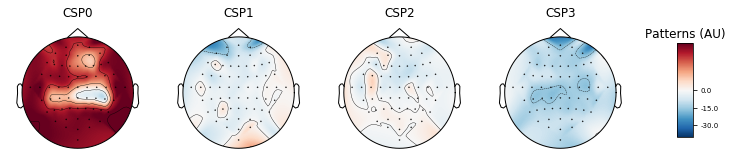

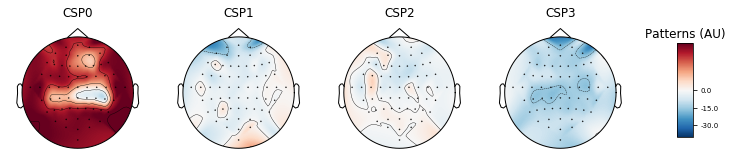

In [86]:
csp.fit_transform(epochs_data,labels)
layout = read_layout('EEG1005')
csp.plot_patterns(epochs.info,layout=layout,ch_type='eeg',units='Patterns (AU)',size=1.5)

In [87]:
sfreq = raw.info['sfreq']
w_length = int(sfreq * 0.5)
w_step = int(sfreq *0.1)
w_start = np.arange(0,epochs_data.shape[2]-w_length,w_step)
scores_windows = []

In [88]:
for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]
    x_train = csp.fit_transform(epochs_data_train[train_idx],y_train)
    x_test = csp.transform(epochs_data_train[test_idx])
    
    lda.fit(x_train,y_train)
    
    score_this_window = []
    
    for n in w_start:
        x_test = csp.transform(epochs_data[test_idx][:,:,n:(n+w_length)])
        score_this_window.append(lda.score(x_test,y_test))
    scores_windows.append(score_this_window)

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


In [89]:
w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin

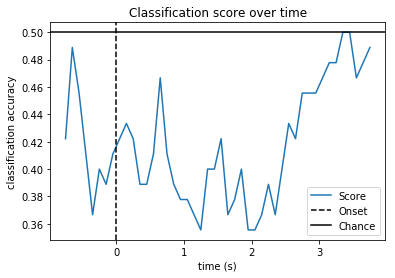

In [90]:
plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')
plt.show()

In [91]:
raw_files[0].find_edf_events()

[[0.0, 4.2, 'T0'],
 [4.2, 4.1, 'T2'],
 [8.3, 4.2, 'T0'],
 [12.5, 4.1, 'T1'],
 [16.6, 4.2, 'T0'],
 [20.8, 4.1, 'T1'],
 [24.9, 4.2, 'T0'],
 [29.1, 4.1, 'T2'],
 [33.2, 4.2, 'T0'],
 [37.4, 4.1, 'T1'],
 [41.5, 4.2, 'T0'],
 [45.7, 4.1, 'T2'],
 [49.8, 4.2, 'T0'],
 [54.0, 4.1, 'T2'],
 [58.1, 4.2, 'T0'],
 [62.3, 4.1, 'T1'],
 [66.4, 4.2, 'T0'],
 [70.6, 4.1, 'T1'],
 [74.7, 4.2, 'T0'],
 [78.9, 4.1, 'T2'],
 [83.0, 4.2, 'T0'],
 [87.2, 4.1, 'T2'],
 [91.3, 4.2, 'T0'],
 [95.5, 4.1, 'T1'],
 [99.6, 4.2, 'T0'],
 [103.8, 4.1, 'T1'],
 [107.9, 4.2, 'T0'],
 [112.1, 4.1, 'T2'],
 [116.2, 4.2, 'T0'],
 [120.4, 4.1, 'T2']]

In [92]:
raw_files[1].find_edf_events()

[[0.0, 4.2, 'T0'],
 [4.2, 4.1, 'T1'],
 [8.3, 4.2, 'T0'],
 [12.5, 4.1, 'T2'],
 [16.6, 4.2, 'T0'],
 [20.8, 4.1, 'T2'],
 [24.9, 4.2, 'T0'],
 [29.1, 4.1, 'T1'],
 [33.2, 4.2, 'T0'],
 [37.4, 4.1, 'T2'],
 [41.5, 4.2, 'T0'],
 [45.7, 4.1, 'T1'],
 [49.8, 4.2, 'T0'],
 [54.0, 4.1, 'T1'],
 [58.1, 4.2, 'T0'],
 [62.3, 4.1, 'T2'],
 [66.4, 4.2, 'T0'],
 [70.6, 4.1, 'T2'],
 [74.7, 4.2, 'T0'],
 [78.9, 4.1, 'T1'],
 [83.0, 4.2, 'T0'],
 [87.2, 4.1, 'T1'],
 [91.3, 4.2, 'T0'],
 [95.5, 4.1, 'T2'],
 [99.6, 4.2, 'T0'],
 [103.8, 4.1, 'T2'],
 [107.9, 4.2, 'T0'],
 [112.1, 4.1, 'T1'],
 [116.2, 4.2, 'T0'],
 [120.4, 4.1, 'T2']]

In [93]:
raw_files[2].find_edf_events()

[[0.0, 4.2, 'T0'],
 [4.2, 4.1, 'T2'],
 [8.3, 4.2, 'T0'],
 [12.5, 4.1, 'T1'],
 [16.6, 4.2, 'T0'],
 [20.8, 4.1, 'T2'],
 [24.9, 4.2, 'T0'],
 [29.1, 4.1, 'T1'],
 [33.2, 4.2, 'T0'],
 [37.4, 4.1, 'T1'],
 [41.5, 4.2, 'T0'],
 [45.7, 4.1, 'T2'],
 [49.8, 4.2, 'T0'],
 [54.0, 4.1, 'T1'],
 [58.1, 4.2, 'T0'],
 [62.3, 4.1, 'T2'],
 [66.4, 4.2, 'T0'],
 [70.6, 4.1, 'T1'],
 [74.7, 4.2, 'T0'],
 [78.9, 4.1, 'T2'],
 [83.0, 4.2, 'T0'],
 [87.2, 4.1, 'T2'],
 [91.3, 4.2, 'T0'],
 [95.5, 4.1, 'T1'],
 [99.6, 4.2, 'T0'],
 [103.8, 4.1, 'T2'],
 [107.9, 4.2, 'T0'],
 [112.1, 4.1, 'T1'],
 [116.2, 4.2, 'T0'],
 [120.4, 4.1, 'T2']]